In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Bidirectional, LSTM
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')
data = '/content/drive/MyDrive/goldpriceinterpolated.csv'
df = pd.read_csv(data)
df

Mounted at /content/drive


,Date,Close,Volume,Open,High,Low
0,2024-01-19,2029.300000,166078.000000,2027.400000,2041.900,2022.200000
1,2024-01-18,2021.600000,167013.000000,2009.100000,2025.600,2007.700000
2,2024-01-17,2006.500000,245194.000000,2031.700000,2036.100,2004.600000
3,2024-01-16,2030.200000,277995.000000,2053.400000,2062.800,2027.600000
4,2024-01-15,2035.550000,271232.750000,2048.350000,2063.925,2028.975000
...,...,...,...,...,...,...
3639,2014-01-26,1263.833333,53945.333333,1268.033333,1277.800,1253.633333
3640,2014-01-25,1264.166667,44471.666667,1266.166667,1275.500,1255.266667
3641,2014-01-24,1264.500000,34998.000000,1264.300000,1273.200,1256.900000
3642,2014-01-23,1262.500000,41697.000000,1235.100000,1267.100,1230.800000


In [3]:
missing_data = df.isnull().sum()
print(missing_data)

Date      0
Close     0
Volume    0
Open      0
High      0
Low       0
dtype: int64


In [4]:
# Memisahkan fitur input dan output
input_features = ['Close']
output_features = ['Close']
X = df[input_features].values   # X ini akan mengambil nilai dari df yang fiturnya di input_features
y = df[output_features].values  # y ini akan mengambil nilai dari df yang fiturnya di output_features
print(X)  # print(y)   # Dataya akan berubah menjadi array, ini juga berlaku untuk y

[[2029.3]
 [2021.6]
 [2006.5]
 ...
 [1264.5]
 [1262.5]
 [1238.6]]


In [5]:
# Normalisasi
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # X_scaled ini adalah hasil transformasi dari X menggunakan MinMaxScaler
y_scaled = scaler.fit_transform(y)  # y_scaled ini adalah hasil transformasi dari y menggunakan MinMaxScaler
#print(X_scaled)

In [6]:
# Memisahkan data latih dan data uji
# Karena menggunakan data time series, maka diperlukan shuffle=False untuk mencegah terjadinya pengacakan ketika split dataset (tetap berurutan sesuai waktu)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False) # 80% data latih dan 20% data uji
#print(X_test)

In [7]:
# Inisialisasi timesteps
# timesteps adalah panjangnya rentang waktu yang akan digunakan sebagai imput model LSTM
timesteps = 7
n_features_input = len(input_features)   # jumlah fitur
n_features_output = len(output_features)

In [8]:
# Mendefinisikan function untuk membuat sequence
def create_sequences(X, y, time_steps) :     # function create_sequence ini menerima parameter dalam ()
  X_seq, y_seq = [], []
  # Melakukan perulangan
  for i in range(len(X)-time_steps) :   # Dikurangi timesteps karena data paling terakhir tidak bisa dilakukan prediksi sebab tidak ada yang menjadi outputnya, data terakhir yang akan dilakukan prediksi adalah data yang ke-6 dari bawah
    X_seq.append(X[i : i+time_steps])   # Memasukkan nilai dari X index ke i sampai index ke i+timesteps sesuai variabel
    y_seq.append(y[i+time_steps])       # mengambil data dari y index ke i+time_steps
 # Mengambalikan nilai sequences
  return np.array(X_seq), np.array(y_seq)

In [9]:
# Memanggil dan menyimpan ke variabel baru
# nilai np.array(X_seq) akan tersimpan di X_train_seq begitu juga untuk y
X_train_seq, y_train_seq = create_sequences(X_train, y_train, timesteps)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, timesteps)

In [10]:
# Memisahkan data latih dan data uji
# Karena menggunakan data time series, maka diperlukan shuffle=False untuk mencegah terjadinya pengacakan ketika split dataset (tetap berurutan sesuai waktu)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False) # 80% data latih dan 20% data uji

# Inisialisasi timesteps
# timesteps adalah panjangnya rentang waktu yang akan digunakan sebagai imput model LSTM
timesteps = 7
n_features_input = len(input_features)   # jumlah fitur
n_features_output = len(output_features)

# Mendefinisikan function untuk membuat sequence
def create_sequences(X, y, time_steps) :     # function create_sequence ini menerima parameter dalam ()
  X_seq, y_seq = [], []
  # Melakukan perulangan
  for i in range(len(X)-time_steps) :   # Dikurangi timesteps karena data paling terakhir tidak bisa dilakukan prediksi sebab tidak ada yang menjadi outputnya, data terakhir yang akan dilakukan prediksi adalah data yang ke-6 dari bawah
    X_seq.append(X[i : i+time_steps])   # Memasukkan nilai dari X index ke i sampai index ke i+timesteps sesuai variabel
    y_seq.append(y[i+time_steps])       # mengambil data dari y index ke i+time_steps
 # Mengambalikan nilai sequences
  return np.array(X_seq), np.array(y_seq)

# Memanggil dan menyimpan ke variabel baru
# nilai np.array(X_seq) akan tersimpan di X_train_seq begitu juga untuk y
X_train_seq, y_train_seq = create_sequences(X_train, y_train, timesteps)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, timesteps)

# Hyperparameter
hidden_layers = 1
batch_size = 4
learning_rate = 0.001
epochs = 50

# Membuat model BiLSTM
model = Sequential()
# Changed X to X_train_seq as this variable has the correct shape
model.add(Bidirectional(LSTM(hidden_layers, return_sequences=True), input_shape=(timesteps, X_train_seq.shape[2])))
model.add(Bidirectional(LSTM(hidden_layers)))
model.add(Dense(1))

# Mengkompilasi model
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Melatih model
history = model.fit(X_train_seq, y_train_seq, epochs=epochs, batch_size=batch_size)

# Melakukan prediksi
y_pred = model.predict(X_test_seq)

# Denormalisasi hasil prediksi
# Denormalisasi hasil prediksi


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 0.0850
Epoch 2/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 9.0492e-04
Epoch 3/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 6.7887e-04
Epoch 4/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 5.7895e-04
Epoch 5/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 5.5485e-04
Epoch 6/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 6.1764e-04
Epoch 7/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 5.6195e-04
Epoch 8/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 5.3737e-04
Epoch 9/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 5.1116e-04
Epoch 10/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 5.0495e-04
Epoch 11/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 4.8934e-04
Epoch 12/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 4.9276e-04
Epoch 13/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 4.8681e-04
Epoch 14/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 4.4973e-04
Ep

In [11]:
# Denormalisasi hasil prediksi
# Ambil nilai terakhir dari setiap baris pada X_test_seq
last_values = np.array([row[-1] for row in X_test_seq])

# Bentuk y_pred menjadi array 2D dengan satu kolom
y_pred_2d = y_pred.reshape(-1, 1)

# Gabungkan data terakhir dan prediksi untuk denormalisasi
y_pred_rescaled = scaler.inverse_transform(np.concatenate((last_values, y_pred_2d), axis=1))[:, -1]

# Denormalisasi target asli
# Ambil nilai terakhir dari setiap baris pada X_test_seq
y_test_2d = y_test_seq.reshape(-1, 1)

# Gabungkan data terakhir dan target asli untuk denormalisasi
y_rescaled = scaler.inverse_transform(np.concatenate((last_values, y_test_2d), axis=1))[:, -1]

# Mencetak beberapa hasil prediksi vs aktual
for i in range(5):  # Menampilkan 5 sampel pertama
    print(f"Aktual: {y_rescaled[i]:.2f}, Prediksi: {y_pred_rescaled[i]:.2f}")


Aktual: 1090.70, Prediksi: 1111.95
Aktual: 1073.60, Prediksi: 1110.95
Aktual: 1087.10, Prediksi: 1106.73
Aktual: 1085.20, Prediksi: 1106.26
Aktual: 1096.20, Prediksi: 1105.71


In [12]:
from sklearn.metrics import mean_absolute_percentage_error

# Menghitung MAPE
mape = mean_absolute_percentage_error(y_rescaled, y_pred_rescaled)
print(f"MAPE: {mape:.4f}")

MAPE: 0.0115


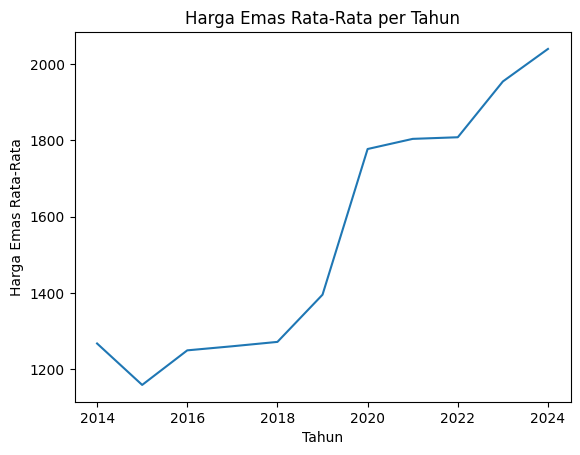

In [13]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# ... (kode Anda sebelumnya untuk mendapatkan 'df')

# 1. Ubah tipe data tanggal
df['Date'] = pd.to_datetime(df['Date'])

# 2. Agregasi data per tahun
df_yearly = df.groupby(df['Date'].dt.year)['Close'].mean().reset_index()

# 3. Buat plot
# 3. Buat plot
plt.plot(df_yearly['Date'], df_yearly['Close'], '-') # Remove fmt and pass '-' as a positional argument

# 4. Format sumbu x
plt.xlabel('Tahun')
plt.ylabel('Harga Emas Rata-Rata')
plt.title('Harga Emas Rata-Rata per Tahun')

plt.show()

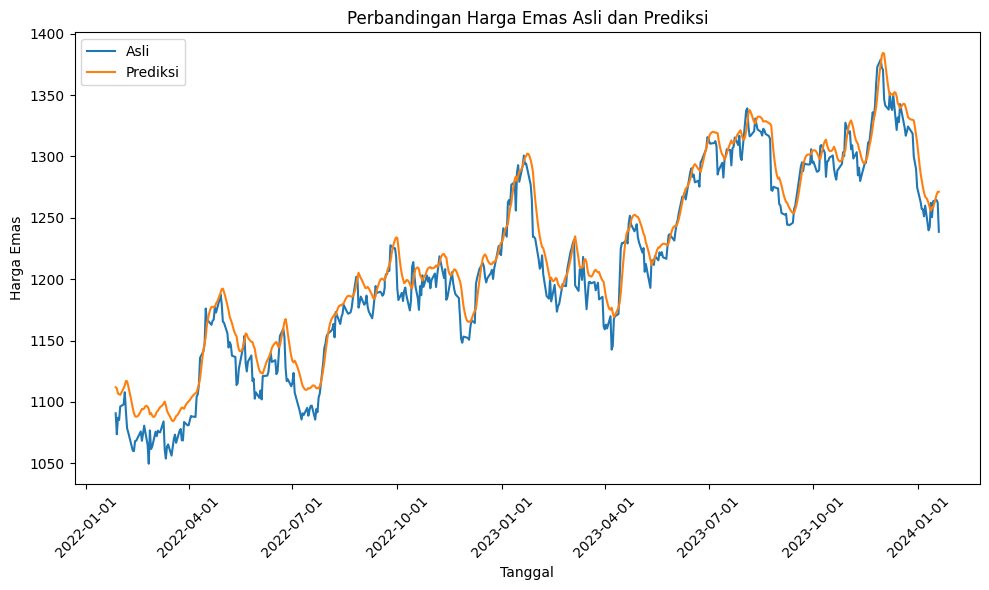

In [14]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# 1. Ubah tipe data kolom 'Date' ke datetime jika belum
df['Date'] = pd.to_datetime(df['Date'])

# 2. Pastikan data terurut berdasarkan tanggal
df = df.sort_values(by='Date')

# 3. Buat figure dan axes
fig, ax = plt.subplots(figsize=(10, 6))

# 4. Plot data asli dan data prediksi
ax.plot(df['Date'][-len(y_rescaled):], y_rescaled, label='Asli')
ax.plot(df['Date'][-len(y_pred_rescaled):], y_pred_rescaled, label='Prediksi')

# 5. Format sumbu x
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

# 6. Tambahkan label dan judul
ax.set_xlabel('Tanggal')
ax.set_ylabel('Harga Emas')
ax.set_title('Perbandingan Harga Emas Asli dan Prediksi')

# 7. Tambahkan legend
ax.legend()

# 8. Tampilkan plot
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

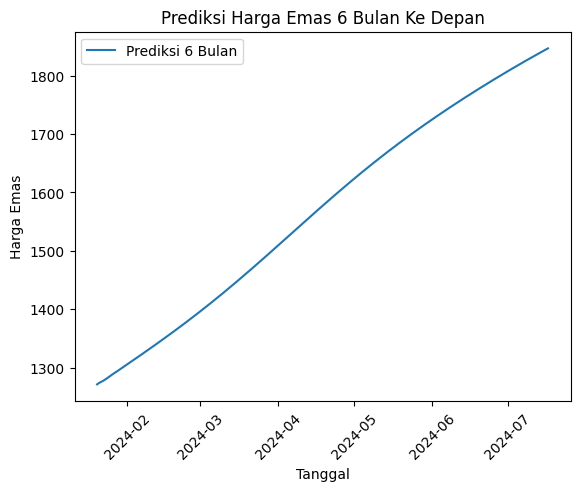

In [15]:
import numpy as np
from datetime import timedelta

# 1. Ambil data terakhir sebagai input untuk prediksi
last_sequence = X_test_seq[-1]

# 2. Buat array untuk menyimpan hasil prediksi 6 bulan ke depan
future_predictions = []

# 3. Prediksi 6 bulan ke depan (180 hari)
for _ in range(180):
  # Prediksi satu langkah ke depan
  next_pred = model.predict(last_sequence.reshape(1, timesteps, n_features_input))

  # Tambahkan prediksi ke array hasil prediksi
  future_predictions.append(next_pred[0, 0])

  # Update last_sequence dengan menambahkan prediksi dan menghapus nilai terlama
  last_sequence = np.append(last_sequence[1:], [np.append(last_sequence[-1][1:], next_pred)], axis=0)

# 4. Denormalisasi hasil prediksi
future_predictions = np.array(future_predictions).reshape(-1, 1)
# Get the last values from last_sequence with the correct shape
# Repeat the last values to match the number of predictions
last_values_future = np.repeat(np.array([last_sequence[-1, :-1]]), 180, axis=0) # Repeat 180 times
future_predictions_rescaled = scaler.inverse_transform(np.concatenate((last_values_future, future_predictions), axis=1))[:, -1]

# 5. Buat range tanggal untuk 6 bulan ke depan
last_date = df['Date'].max()
future_dates = [last_date + timedelta(days=i) for i in range(1, 181)]

# 6. Plot hasil prediksi
plt.plot(future_dates, future_predictions_rescaled, label='Prediksi 6 Bulan')
plt.xlabel('Tanggal')
plt.ylabel('Harga Emas')
plt.title('Prediksi Harga Emas 6 Bulan Ke Depan')
plt.xticks(rotation=45)
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

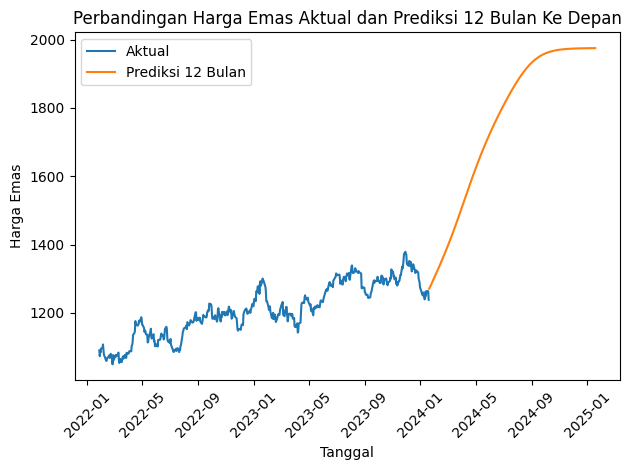

In [16]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
from datetime import timedelta

# 1. Ambil data terakhir sebagai input untuk prediksi
last_sequence = X_test_seq[-1]

# 2. Buat array untuk menyimpan hasil prediksi 12 bulan ke depan
future_predictions = []

# 3. Prediksi 12 bulan ke depan (365 hari)
for _ in range(365):
    # Prediksi satu langkah ke depan
    next_pred = model.predict(last_sequence.reshape(1, timesteps, n_features_input))

    # Tambahkan prediksi ke array hasil prediksi
    future_predictions.append(next_pred[0, 0])

    # Update last_sequence dengan menambahkan prediksi dan menghapus nilai terlama
    last_sequence = np.append(last_sequence[1:], [np.append(last_sequence[-1][1:], next_pred)], axis=0)

# 4. Denormalisasi hasil prediksi
future_predictions = np.array(future_predictions).reshape(-1, 1)
# Get the last values from last_sequence with the correct shape
# Repeat the last values to match the number of predictions
last_values_future = np.repeat(np.array([last_sequence[-1, :-1]]), 365, axis=0)  # Repeat 365 times
future_predictions_rescaled = scaler.inverse_transform(np.concatenate((last_values_future, future_predictions), axis=1))[:, -1]

# 5. Buat range tanggal untuk 12 bulan ke depan
last_date = df['Date'].max()
future_dates = [last_date + timedelta(days=i) for i in range(1, 366)]

# 6. Plot hasil prediksi
plt.plot(df['Date'][-len(y_rescaled):], y_rescaled, label='Aktual')
plt.plot(future_dates, future_predictions_rescaled, label='Prediksi 12 Bulan')
plt.xlabel('Tanggal')
plt.ylabel('Harga Emas')
plt.title('Perbandingan Harga Emas Aktual dan Prediksi 12 Bulan Ke Depan')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()